# Geopandas
Visualizar data em mapas ajuda muito nas tarefas da ciência de dados, que podem ser feitos usando o geopandas. Aqui vamos explorar o método de criar mapas e visualizar dados sobre isso. Usando shapefiles (.shp) e bibliotecas Python.

Vamos trabalhar em uma cidade chamada Rajasthan. O arquivo .shp está aqui https://www.arcgis.com/home/item.html?id=acb8cb18e7cd45c982086b6ef2bb5a62

## Instalação para o gerenciaddor de arquivos shp

pip install pyshp

## Importando

In [2]:
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns

## Inicialização de conjunto de visualização

In [4]:
sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.mpl.rc("figure", figsize=(10,6))

## Abrindo mapa vetorial
Um mapa vetorial é um grupo de arquivos .shp

In [6]:
shp_path = "District_Boundary.shp"
sf = shp.Reader(shp_path)

In [9]:
print(len(sf.shapes()))

33


Se você buscar o tamanho de shapes, vamos obter 33, ou seja, temos 33 cidades na região de Rajasthan

Buscando os registros:

In [12]:
sf.records()

[Record #0: ['JAISALMER', 'RAJASTHAN', 508247, 38487.17, 1],
 Record #1: ['BARMER', 'RAJASTHAN', 1964835, 28550.95, 2],
 Record #2: ['JALOR', 'RAJASTHAN', 1448940, 10647.4, 3],
 Record #3: ['DUNGARPUR', 'RAJASTHAN', 1107643, 3770.78, 4],
 Record #4: ['JHALAWAR', 'RAJASTHAN', 1180323, 6315.27, 5],
 Record #5: ['BARAN', 'RAJASTHAN', 1021653, 6993.94, 6],
 Record #6: ['BUNDI', 'RAJASTHAN', 962620, 5776.48, 7],
 Record #7: ['TONK', 'RAJASTHAN', 1211547, 7190.38, 8],
 Record #8: ['BHILWARA', 'RAJASTHAN', 2013789, 10445.18, 9],
 Record #9: ['NAGAUR', 'RAJASTHAN', 2761447, 17805.1, 10],
 Record #10: ['JODHPUR', 'RAJASTHAN', 2876652, 22696.9, 11],
 Record #11: ['BIKANER', 'RAJASTHAN', 1902110, 30279.27, 12],
 Record #12: ['CHURU', 'RAJASTHAN', 1688266, 13844.05, 13],
 Record #13: ['JHUNJHUNUN', 'RAJASTHAN', 1913689, 5911.03, 14],
 Record #14: ['SIKAR', 'RAJASTHAN', 2283647, 7726.75, 15],
 Record #15: ['DHAULPUR', 'RAJASTHAN', 977771, 3040.33, 16],
 Record #16: ['HANUMANGARH', 'RAJASTHAN', 1518

In [13]:
sf.records()[1][0]

'BARMER'

## Convertendo Shapefile Data em Dataframe Pandas

In [16]:
def read_shapefile(sf):
    #obtendo os nomes das cidades
    fields = [x[0] for x in sf.fields][1:]
    
    #obtendo os registros do arquivo shape
    records = [list(i) for i in sf.records()]
    shps = [s.points for s in sf.shapes()]
    
    # Convertendo shapefile em um dataframe do pandas
    df = pd.DataFrame(columns=fields, data=records)
    
    # atribuindo as coordenadas
    df = df.assign(coords=shps)
    return df

In [19]:
df = read_shapefile(sf)

print(df)

         DIST_NAME STATE_NAME  POPULATION  AREA_SQ_KM  ID  \
0        JAISALMER  RAJASTHAN      508247    38487.17   1   
1           BARMER  RAJASTHAN     1964835    28550.95   2   
2            JALOR  RAJASTHAN     1448940    10647.40   3   
3        DUNGARPUR  RAJASTHAN     1107643     3770.78   4   
4         JHALAWAR  RAJASTHAN     1180323     6315.27   5   
5            BARAN  RAJASTHAN     1021653     6993.94   6   
6            BUNDI  RAJASTHAN      962620     5776.48   7   
7             TONK  RAJASTHAN     1211547     7190.38   8   
8         BHILWARA  RAJASTHAN     2013789    10445.18   9   
9           NAGAUR  RAJASTHAN     2761447    17805.10  10   
10         JODHPUR  RAJASTHAN     2876652    22696.90  11   
11         BIKANER  RAJASTHAN     1902110    30279.27  12   
12           CHURU  RAJASTHAN     1688266    13844.05  13   
13      JHUNJHUNUN  RAJASTHAN     1913689     5911.03  14   
14           SIKAR  RAJASTHAN     2283647     7726.75  15   
15        DHAULPUR  RAJA

In [20]:
df.sample(5)

,DIST_NAME,STATE_NAME,POPULATION,AREA_SQ_KM,ID,coords
26,JAIPUR,RAJASTHAN,3348274,11136.02,27,"[(624250.6874549538, 3072224.500005408), (6242..."
24,UDAIPUR,RAJASTHAN,2480697,11772.83,25,"[(426861.53137461026, 2708189.250046377), (426..."
18,CHITTAURGARH,RAJASTHAN,1330360,7837.04,19,"[(415994.2188694852, 2760917.4998599226), (415..."
12,CHURU,RAJASTHAN,1688266,13844.05,13,"[(541766.9376083581, 3208035.749954137), (5418..."
10,JODHPUR,RAJASTHAN,2876652,22696.90,11,"[(345027.96878536354, 2888848.2501832694), (34..."


## Plotando o mapa da cidade em Rajasthan com ajuda do Matplotlib
    a) Plotar um poligono baseado das coordenadas
    
    b) Calcular e retornar o pontos médio de um poligono
    
    Esse ponto médio é usado para definir onde ficará o nome da cidade

In [24]:
def plot_shape(id, s=None):
    plt.figure()
    
    # plotando os eixos gráficos onde o mapa vai ser plotado
    ax = plt.axes()
    ax.set_aspect('equal')
    
    # Guardando o id para o futuro
    shape_ex = sf.shape(id)
    
    # NP.ZERO inicializa um array com linhas e colunas 0 em cada posição
    # vai ser gerado o número de linhas vai ser len(shape_ex.point) e o número de colunas vai ser 1
    x_lon = np.zeros((len(shape_ex.points),1))

    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
        
    # plotando usando coordenadas derivadas no array criado pelo numpy
    plt.plot(x_lon,y_lat) 
    x0 = np.mean(x_lon)
    y0 = np.mean(y_lat)
    plt.text(x0, y0, s, fontsize=10)
    
    # usando bbox para plotar:
    plt.xlim(shape_ex.bbox[0],shape_ex.bbox[2])
    return x0, y0

## Setando o nome da cidade

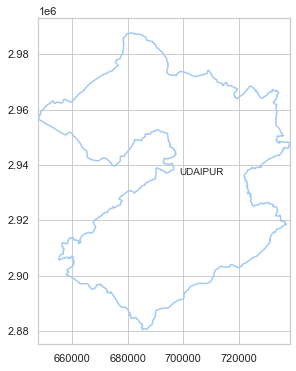

In [42]:
DIST_NAME = 'UDAIPUR'

# obter o id da cidade que vai ser plotado

com_id =df[df.DIST_NAME == 'JAIPUR']["ID"].values[0]

plot_shape(com_id, DIST_NAME)

sf.shape(com_id)

## Plotando o mapa inteiro
Essa função combina todos os shapes em usamos usando as coordenadas para mostrar a forma combinada

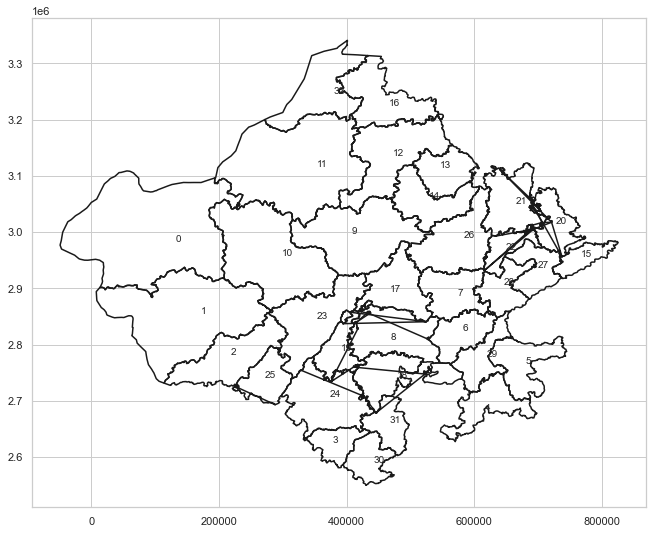

In [54]:
def plot_map(sf, x_lim=None, y_lim= None, figsize = (11,9)):
    plt.figure(figsize = figsize)
    id = 0
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')
        
        if(x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            plt.text(x0, y0, id, fontsize=10)
        id = id + 1
        
        if (x_lim != None) & (y_lim != None):     
            plt.xlim(x_lim)
            plt.ylim(y_lim)
plot_map(sf)

## Colorindo
Podemos coloriar usando ax.fill

<Figure size 792x648 with 0 Axes>

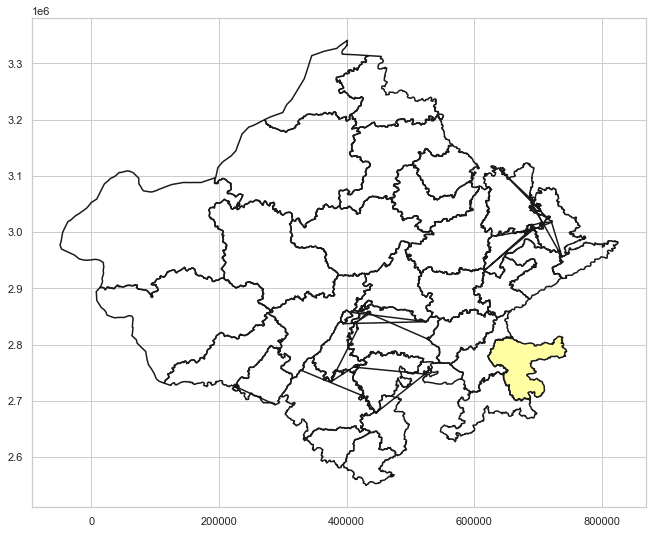

In [58]:
def plot_map_fill(id, sf, x_lim=None, y_lim=None, figsize=(11,9), color='r'):
    plt.figure(figsize=figsize)
    fig, ax = plt.subplots(figsize=figsize)
    
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        ax.plot(x, y, 'k')
    
    shape_ex = sf.shape(id)
    x_lon = np.zeros((len(shape_ex.points), 1))
    y_lat = np.zeros((len(shape_ex.points), 1))
    
    for ip in range(len(shape_ex.points)):
            x_lon[ip] = shape_ex.points[ip][0]
            y_lat[ip] = shape_ex.points[ip][1]
    ax.fill(x_lon, y_lat, color)
    
    if (x_lim != None) & (y_lim != None):
        plt.xlim(x_lim)
        plt.ylim(y_lim)
plot_map_fill(5,sf,color='y')

## Múltiplas regiões

<Figure size 792x648 with 0 Axes>

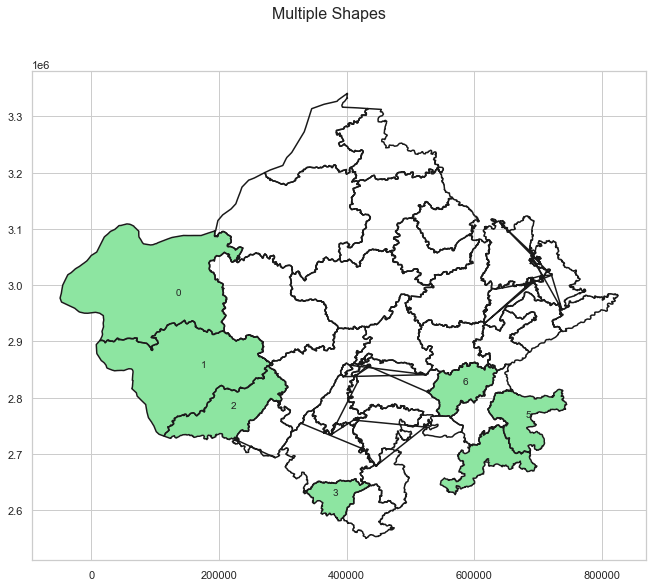

In [70]:
def plot_map_fill_multiples_ids(title, city, sf, x_lim=None, y_lim=None, figsize=(11,9), color='r'):
    plt.figure(figsize=figsize)
    fig, ax = plt.subplots(figsize=figsize)
    fig.suptitle(title, fontsize=16)
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        ax.plot(x, y, 'k')
    
    for id in city:
        shape_ex = sf.shape(id)
        x_lon = np.zeros((len(shape_ex.points), 1))
        y_lat = np.zeros((len(shape_ex.points), 1))
        
        for ip in range(len(shape_ex.points)):
            x_lon[ip] = shape_ex.points[ip][0]
            y_lat[ip] = shape_ex.points[ip][1]
        ax.fill(x_lon,y_lat, color)
        
        x0 = np.mean(x_lon)
        y0 = np.mean(y_lat)
        plt.text(x0, y0, id, fontsize=10)
        
        if (x_lim != None) & (y_lim != None):     
            plt.xlim(x_lim)
            plt.ylim(y_lim)

city_id = [0, 1, 2, 3, 4, 5, 6]

plot_map_fill_multiples_ids("Multiple Shapes", city_id, sf, color = 'g')

## Usando geopandas
Nós vimos como vizualizar usando o dataframe do geopanads, que torna o trabalho muito mais rápido. 

### Instalação
pip install geopandas

Obs.: Se der erro, rode isso aqui:
se der erro, rode isso aqui:

pip install wheel
pip install pipwin

pipwin install numpy
pipwin install pandas
pipwin install shapely
pipwin install gdal
pipwin install fiona
pipwin install pyproj
pipwin install six
pipwin install rtree
pipwin install geopandas

### Importação

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

### Obtendo dados de interesse
Vamos mapear usando a população, vamos ver um caminho para abrir um shapefile do Rajasthan através do pandas

In [2]:
fp = "District_Boundary.shp"

map_df = gpd.read_file(fp)

map_df.head()

,DIST_NAME,STATE_NAME,POPULATION,AREA_SQ_KM,ID,geometry
0,JAISALMER,RAJASTHAN,508247,38487.17,1,"POLYGON ((157738.063 2935783.500, 157694.594 2..."
1,BARMER,RAJASTHAN,1964835,28550.95,2,"POLYGON ((157738.063 2935783.500, 157781.250 2..."
2,JALOR,RAJASTHAN,1448940,10647.40,3,"POLYGON ((277249.469 2855619.500, 277361.906 2..."
3,DUNGARPUR,RAJASTHAN,1107643,3770.78,4,"POLYGON ((359076.688 2650355.000, 359189.719 2..."
4,JHALAWAR,RAJASTHAN,1180323,6315.27,5,"POLYGON ((684142.750 2703277.750, 684144.062 2..."


<AxesSubplot:>

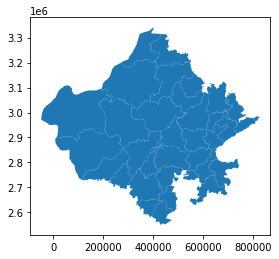

In [3]:
map_df.plot()

### tratando os dados

In [14]:

# projeção de colunas
map_df = map_df[['DIST_NAME', 'POPULATION', 'geometry']]

# Renomeando as colunas
map_df = map_df.rename(index=str, columns={'DIST_NAME': 'DISTRICT','POPULATION': 'POP'})

In [19]:
map_df.head()

,DISTRICT,POP,geometry
0,JAISALMER,508247,"POLYGON ((157738.063 2935783.500, 157694.594 2..."
1,BARMER,1964835,"POLYGON ((157738.063 2935783.500, 157781.250 2..."
2,JALOR,1448940,"POLYGON ((277249.469 2855619.500, 277361.906 2..."
3,DUNGARPUR,1107643,"POLYGON ((359076.688 2650355.000, 359189.719 2..."
4,JHALAWAR,1180323,"POLYGON ((684142.750 2703277.750, 684144.062 2..."


<AxesSubplot:title={'center':'População de Rajasthan'}>

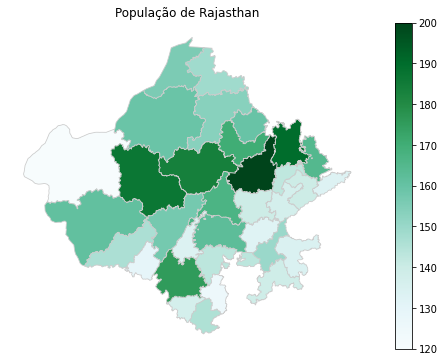

In [30]:
variable = 'POP'

vmin, vmax = 120, 200

fig, ax = plt.subplots(1, figsize=(10, 6))

# Remover grave
ax.axis('off')

# colocar título
ax.set_title('População de Rajasthan')

# criando barra
sm = plt.cm.ScalarMappable(cmap='BuGn', norm=plt.Normalize(vmin=vmin, vmax=vmax))

sm._A = []

cbar = fig.colorbar(sm)

map_df.plot(column=variable, cmap='BuGn', linewidth=0.8, ax=ax, edgecolor='0.8')

## Mapeando com basemap
Matplotlib basemap toolkit é uma biblioteca para plotar dados em mapas em Python. Basemap não faz qualquer plot por se só, mas facilita.

Para plotar, usaremos o Matplotlib

### Instalação
pip install basemap
pip install basemap-data-hires

### Observação
Não vou continuar aqui, pois esta biblioteca parou foi depreciada